In [16]:
%load_ext autoreload
%autoreload 2

import traceback
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
from keras import backend as K
K.set_session(sess)

/home/yoyoteng/anaconda3/envs/py35tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/yoyoteng/anaconda3/envs/py35tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/yoyoteng/anaconda3/envs/py35tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/yoyoteng/anaconda3/envs/py35tf/lib

In [3]:
from make_line_on_xray import get_xray

/home/yoyoteng/anaconda3/envs/py35tf/lib/python3.6/site-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


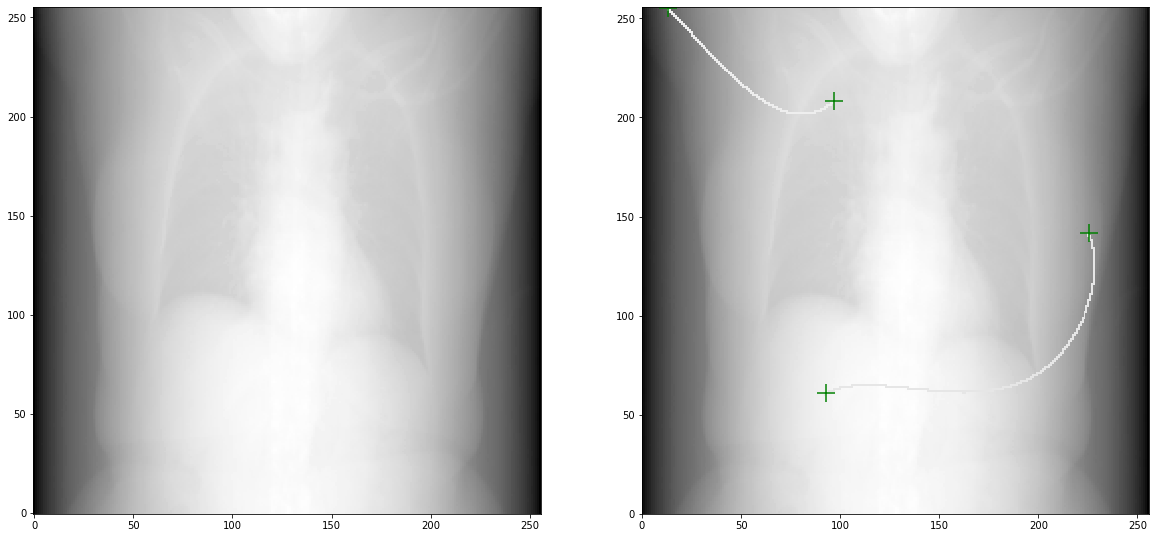

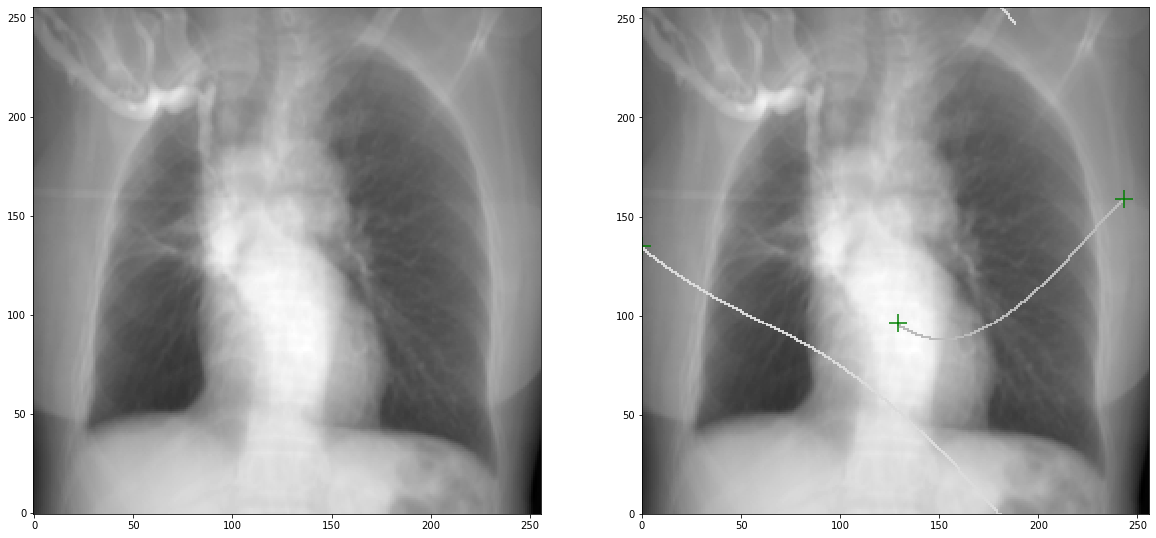

In [4]:
for n in range(2):
    try:
        xray, container = get_xray(isplot=True,fignum=n)
    except:
        pass
        traceback.print_exc()

In [5]:
from make_line_on_xray import (
    make_xray_data,
    get_grid, get_code,
)

from mask_yolo_model import (
    get_mask_yolo_model,
    dice_coef_loss,
    vec_loss,
    MASK, VECTOR,
    EarlyStopping,
    opt,
)

In [21]:
def viz_results(x_test,y_test0,ytest1,pred,szx,szy):
    obj_ind = -1
    #for ind in range(pred.shape[0]):
    for ind in range(5):

        plt.figure(ind,figsize=(20,10))
        #print(pred[0][ind,:,:,obj_ind])
        maxval = np.max(pred[0][ind,:,:,obj_ind])
        argmax = np.argwhere(pred[0][ind,:,:,obj_ind]==maxval)
        argmaxx,argmaxy=argmax[0]
        print(print(argmax.shape),argmax[0])
        
        print('pred',pred[0][ind,argmaxx,argmaxy,:])
        print('true',y_test0[ind,argmaxx,argmaxy,:])
        print('------')
        
        # GROUND TRUTH
        sa=plt.subplot(331)
        plt.title('sample index: {}, t:green, p:blue'.format(ind))
        sa.imshow(x_test[ind,:].squeeze(),cmap='gray')
        
        # overlay bounding box
        argmax = get_code(argmaxx,argmaxy,smx)
        ax,ay=grid_anchor[argmax]
        x,y,w,h,o = pred[0][ind,argmaxx,argmaxy,:]
        x,y,w,h,o = x*szx,y*szy,w*szx,h*szy,o
        x,y = ax+x,ay+y
        x,y = x-w/2.,y-h/2.
        rect = patches.Rectangle((y,x),h,w,linewidth=2,edgecolor='b',facecolor='none')
        sa.add_patch(rect)
        
        x,y,w,h,o = y_test0[ind,argmaxx,argmaxy,:]
        x,y,w,h,o = x*szx,y*szy,w*szx,h*szy,o
        x,y = ax+x,ay+y
        x,y = x-w/2.,y-h/2.
        rect = patches.Rectangle((y,x),h,w,linewidth=2,edgecolor='g',facecolor='none')
        sa.add_patch(rect)
        
        obj_real = y_test0[ind,:,:,obj_ind].squeeze()
        
        plt.subplot(332)
        plt.title('obj or not - truth'.format())
        plt.imshow(obj_real,cmap='gray')
        
        ax = plt.subplot(333)
        plt.title('obj or not - truth - actual val'.format())
        plt.plot(obj_real.ravel())
        ax.set_ylim(0,1)
        
        # PREDICTED
        
        obj = pred[0][ind,:,:,obj_ind].squeeze()
        
        plt.subplot(334)
        plt.title('obj or not - pred'.format())
        plt.imshow(obj,cmap='gray')
        plt.subplot(335)
        plt.title('obj or not - pred - actual val'.format())
        plt.imshow(obj,vmin=0,vmax=1,cmap='gray')
        
        ax = plt.subplot(336)
        plt.title('obj or not - pred - actual val'.format())
        plt.plot(obj.ravel())
        ax.set_ylim(0,1)
        
        if len(pred)>1:
            plt.subplot(337)
            plt.title('true-mask'.format(argmax))
            plt.imshow(y_test1[ind,:,:,argmax].squeeze(),cmap='gray')
            plt.subplot(338)
            plt.title('pred-mask argmax:{}'.format(argmax))
            plt.imshow(pred[1][ind,:,:,argmax].squeeze(),cmap='gray')
            

In [7]:
szx,szy,szz=256,256,256
smx,smy=8,8
# 256x128,64,32
x_train, y_train0, y_train1 = make_xray_data(N=100)
x_val, y_val0, y_val1 = make_xray_data(N=20)
x_test, y_test0, y_test1 = make_xray_data(N=5)
grid, grid_anchor = get_grid()

Traceback (most recent call last):
  File "/media/external/scisoft/line-detection/make_line_on_xray.py", line 92, in make_xray_data
    terrain, container = get_xray()
  File "/media/external/scisoft/line-detection/make_line_on_xray.py", line 41, in get_xray
    xray, container = make_one_sample(isplot=isplot,fignum=fignum,nx=256,ny=256,baseimage=xray)
  File "/media/external/scisoft/line-detection/make_line.py", line 99, in make_one_sample
    _, _, linexorg,lineyorg, linex, liney = make_line(nx=nx,ny=ny,minlen=minlen)
  File "/media/external/scisoft/line-detection/make_line.py", line 61, in make_line
    raise LookupError('ok1')
LookupError: ok1
Traceback (most recent call last):
  File "/media/external/scisoft/line-detection/make_line_on_xray.py", line 92, in make_xray_data
    terrain, container = get_xray()
  File "/media/external/scisoft/line-detection/make_line_on_xray.py", line 41, in get_xray
    xray, container = make_one_sample(isplot=isplot,fignum=fignum,nx=256,ny=256,basei

[[3 4]
 [4 4]
 [6 7]]
28 3 8 4 0
36 4 8 4 0
55 6 8 7 0


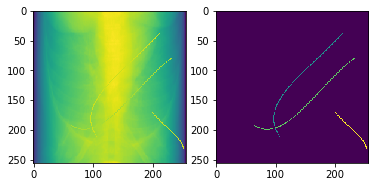

In [12]:
ind = -1
plt.subplot(121)
plt.imshow(x_train[ind,:].squeeze())

region = np.argwhere(y_train0[ind,:,:,-1]==1)
print(region)
tmp = np.zeros((szx,szy))
r=1
if len(region.squeeze().shape) > 0:
    for x,y in region:
        code = smx*x+y
        print(code,x,smx,y,np.sum(y_train1[ind,x,y,code]))
        tmp[y_train1[ind,:,:,code].squeeze()==1]=r+1
        r+=1
plt.subplot(122)
plt.imshow(tmp)

In [ ]:
model = get_mask_yolo_model(szx,szy)
model.summary()

yolo_loss = {
    MASK: dice_coef_loss,
    VECTOR: vec_loss,
}
loss_weights = {
    MASK: 1.,
    VECTOR: 1.,
}

verbose=1
batch_size=32
epochs=1000
lr=1E-4
decay=1E-3
patience=10
beta_1=0.9
beta_2=0.999

early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=patience,
                              verbose=0,
                              mode='min')

callbacks = [early_stopping]
optimizer = opt.Adam(lr=lr,beta_1=beta_1, beta_2=beta_2, decay=decay)
model.compile(loss=yolo_loss, loss_weights=loss_weights, optimizer=optimizer)
history = model.fit(x_train, {VECTOR:y_train0,MASK:y_train1},
                    batch_size=batch_size, epochs=epochs,
                    verbose=verbose, 
                    validation_data=(x_val, {VECTOR:y_val0, MASK:y_val1}),
                    callbacks=callbacks)

# fixing dice,dice loss is nan, source data fixed.
# 1.37, 1.42
# decreased lr from 1E-3 to 1E-4


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_37 (Conv2D)              (None, 256, 256, 16) 144         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_51 (BatchNo (None, 256, 256, 16) 64          conv2d_37[0][0]                  
__________________________________________________________________________________________________
leaky_re_lu_51 (LeakyReLU)      (None, 256, 256, 16) 0           batch_normalization_51[0][0]     
__________________________________________________________________________________________________
max_poolin

Train on 100 samples, validate on 20 samples
Epoch 1/1000
100/100 [==============================] - 11s 109ms/step - loss: 5.9393 - VECTOR_loss: 0.6886 - MASK_loss: 0.9926 - val_loss: 5.8779 - val_VECTOR_loss: 0.6366 - val_MASK_loss: 0.9930
Epoch 2/1000
100/100 [==============================] - 3s 28ms/step - loss: 5.8965 - VECTOR_loss: 0.6591 - MASK_loss: 0.9927 - val_loss: 5.8146 - val_VECTOR_loss: 0.5864 - val_MASK_loss: 0.9930
Epoch 3/1000
100/100 [==============================] - 3s 27ms/step - loss: 5.8758 - VECTOR_loss: 0.6515 - MASK_loss: 0.9926 - val_loss: 5.7637 - val_VECTOR_loss: 0.5486 - val_MASK_loss: 0.9930
Epoch 4/1000
100/100 [==============================] - 3s 26ms/step - loss: 5.8423 - VECTOR_loss: 0.6310 - MASK_loss: 0.9926 - val_loss: 5.7294 - val_VECTOR_loss: 0.5271 - val_MASK_loss: 0.9930
Epoch 5/1000
100/100 [==============================] - 3s 26ms/step - loss: 5.8242 - VECTOR_loss: 0.6257 - MASK_loss: 0.9926 - val_loss: 5.6979 - val_VECTOR_loss: 0.5083 - 

In [14]:
x_0, y_0, y_1 = x_train, y_train0, y_train1
out = model.evaluate(x_0,{VECTOR:y_0, MASK:y_1})
print('train',out)
x_0, y_0, y_1 = x_val, y_val0, y_val1
out = model.evaluate(x_0,{VECTOR:y_0, MASK:y_1})
print('val',out)
x_0, y_0, y_1 = x_test, y_test0, y_test1
out = model.evaluate(x_0,{VECTOR:y_0, MASK:y_1})
print('test',out)

100/100 [==============================] - 2s 18ms/step
train [1.378774218559265, 0.12038022994995118, 0.9580464291572571]
20/20 [==============================] - 0s 18ms/step
val [1.4211021661758423, 0.15135972201824188, 0.969394862651825]
5/5 [==============================] - 0s 20ms/step
test [1.463234782218933, 0.19707053899765015, 0.965816855430603]


(1, 2)
None [4 1]
pred [0.10474628 0.1139836  0.30040315 0.37806424 0.2681414 ]
true [0.08398438 0.05664062 0.39453125 0.31640625 1.        ]
------
(1, 2)
None [5 5]
pred [0.13866127 0.10001504 0.3063689  0.35243118 0.11441424]
true [0. 0. 0. 0. 0.]
------
(1, 2)
None [4 5]
pred [0.1824331  0.12830698 0.3094535  0.3866329  0.40517795]
true [0. 0. 0. 0. 0.]
------
(1, 2)
None [4 5]
pred [0.13258988 0.09197801 0.30914995 0.39766455 0.14791322]
true [0. 0. 0. 0. 0.]
------
(1, 2)
None [3 6]
pred [0.20604116 0.10382783 0.3453387  0.2859617  0.62403953]
true [0. 0. 0. 0. 0.]
------


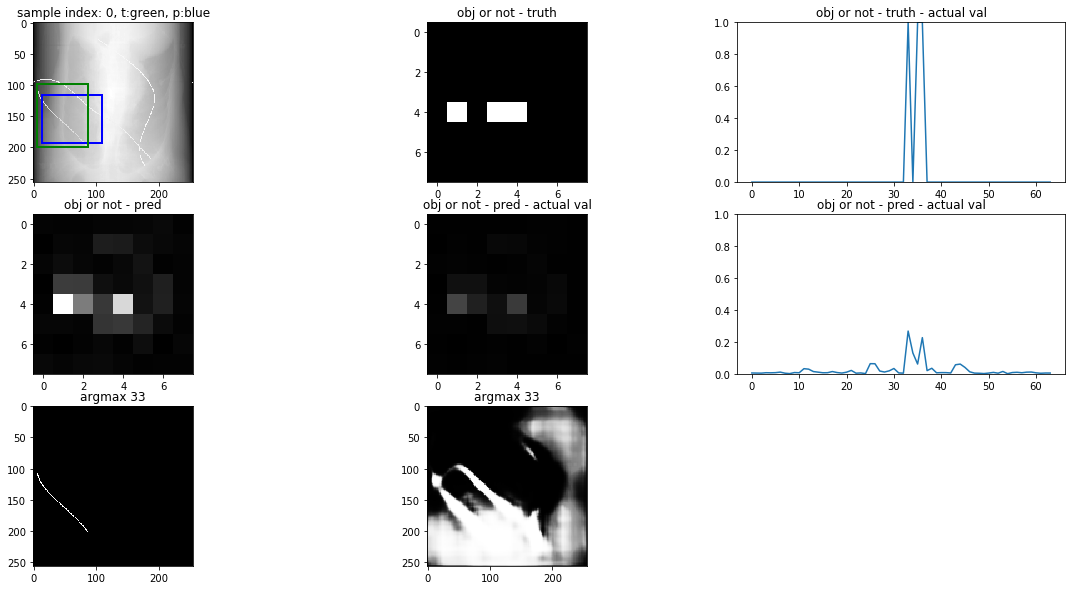

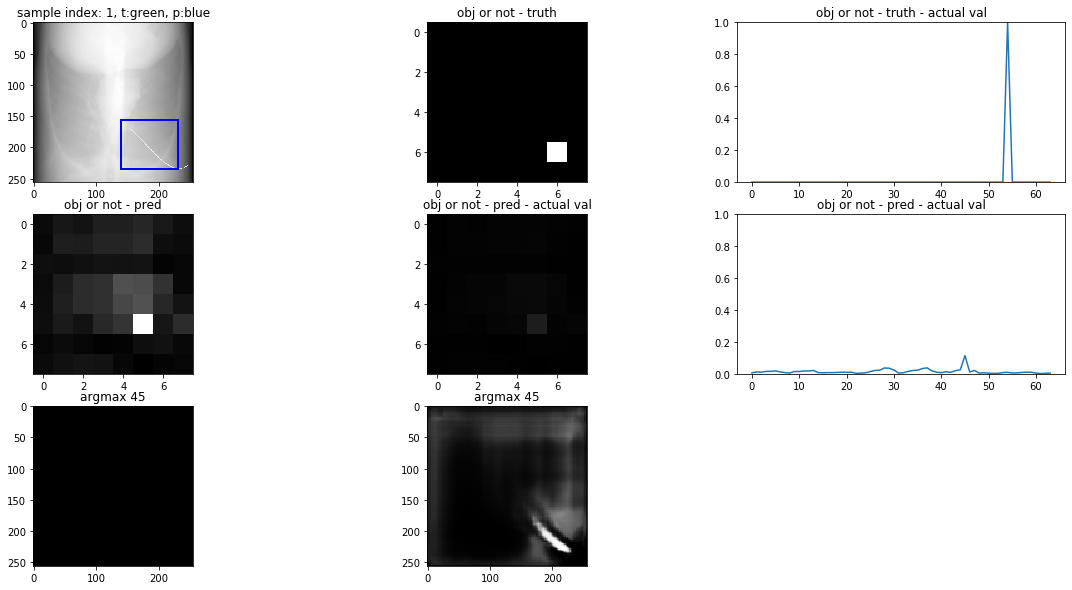

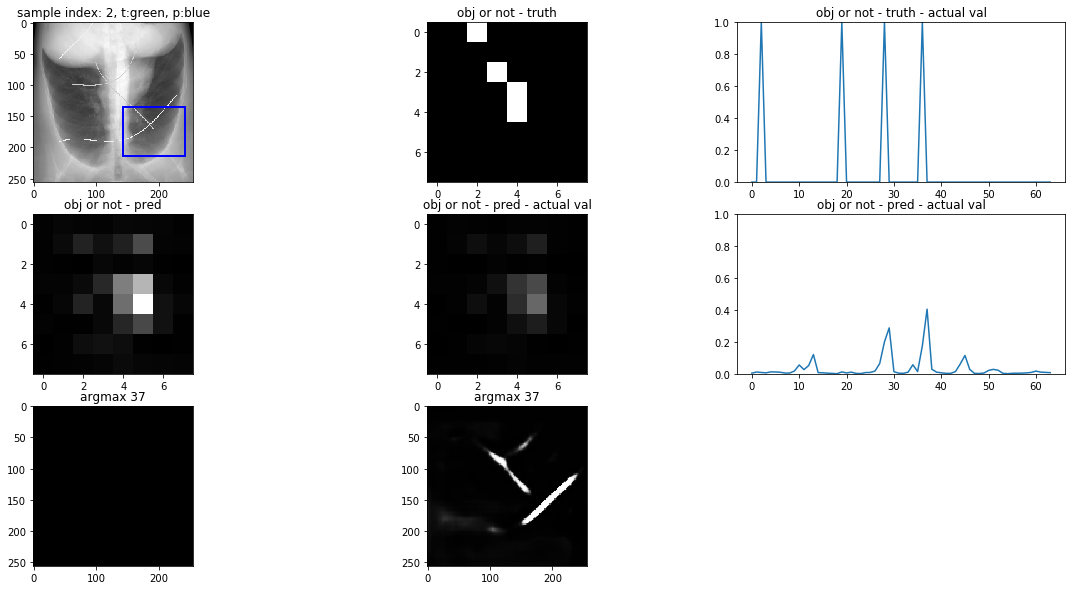

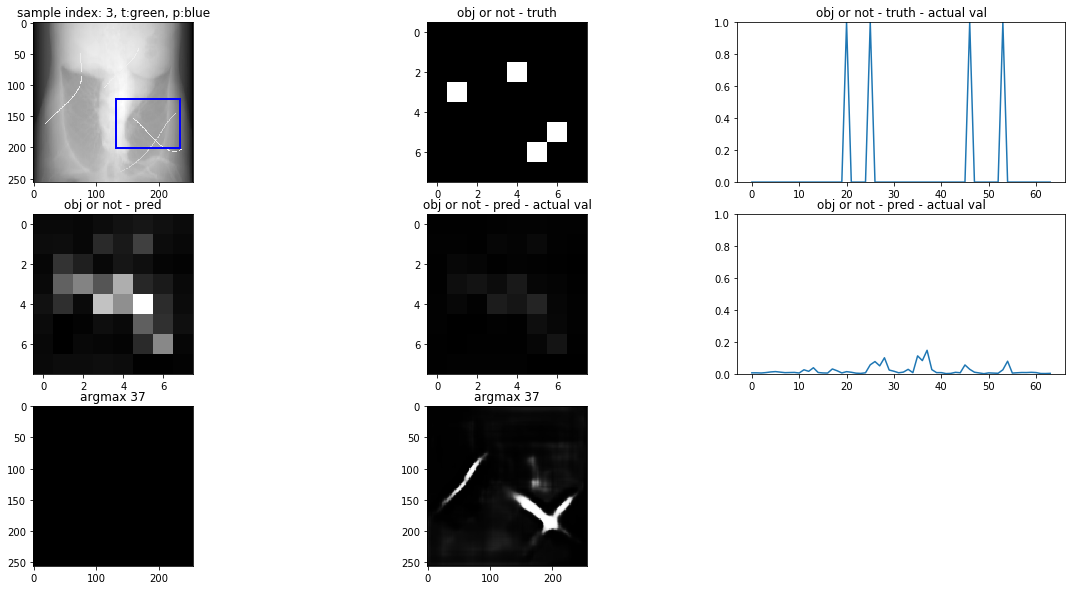

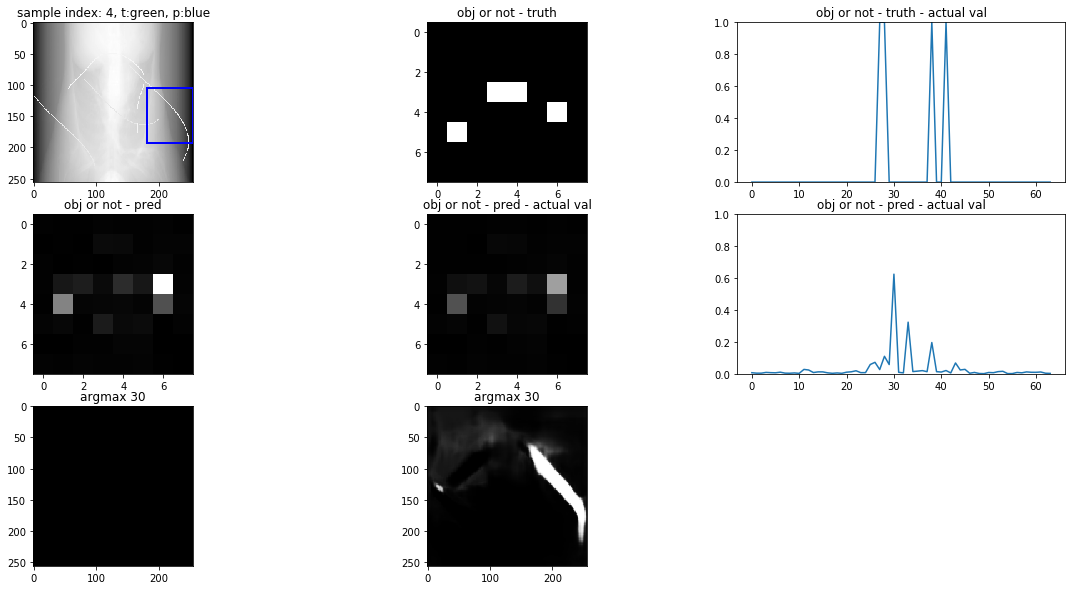

In [22]:
x_0, y_0, y_1 = x_test, y_test0, y_test1
#x_0, y_0, y_1 = x_train, y_train0, y_train1
#x_0, y_0, y_1 = x_val, y_val0, y_val1
pred = model.predict(x_0)
viz_results(x_0,y_0,y_1,pred,szx,szy)